In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from src.utils import create_acs_dataset
from src.jnb_utils import get_model, get_SCHL_thresholds, plot_calibration_curve, plot_x_calibration_curves, print_stats

# single-feature plots (Section 3)

## Data selection

In [2]:
STATE = 'NY'; THRESHOLD = 5e4; PA = 'SEX'

SEED = 1

In [3]:
MODEL = 'LR'

## aware LR model

In [4]:
features, label, group = create_acs_dataset('income', STATE, THRESHOLD, include_protected=True, 
                                        protected_att=PA, only_features=['SCHL'])

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=SEED)

# model
model = get_model(MODEL)
model.fit(X_train, y_train)

yhat = model.predict(X_test)
yhat_probs = model.predict_proba(X_test)[:,1]

acc1, auc1, out1 = print_stats(y_test, yhat, yhat_probs, group_test)

dataset size: (103021, 2)
base rates: 0.4698852772466539 0.35899457861015277
avg prediction: 0.4719812656217198 0.35657646598955556
avg outcome: 0.4770554493307839 0.21241991128634796
auroc: 0.7368985163316195
accuracy: 0.6995874787672894
accuracy per group: 0.6767686424474187 0.7231148348940365


#### plots

[19.5, 21.5]


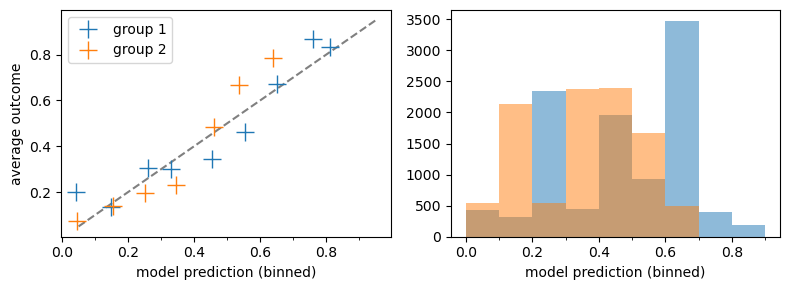

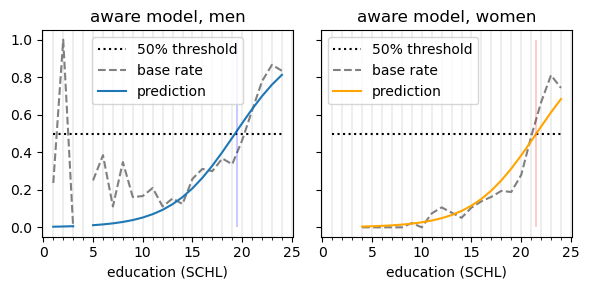

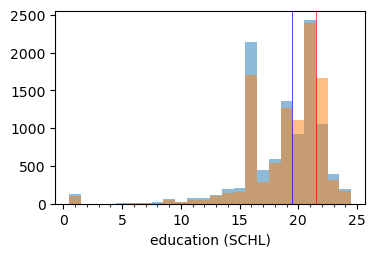

In [5]:
# get SCHL thresholds for positive classification (>0.5 prediction)
thresholds = get_SCHL_thresholds(model, with_PA=True)
print(thresholds)
# prediction calibration
plot_calibration_curve(yhat_probs, y_test, group_test)
# calibration per X value
plot_x_calibration_curves(yhat_probs, group_test, X_test, y_test, thresholds, 'aware')

## unaware LR model

In [6]:
features, label, group = create_acs_dataset('income', STATE, THRESHOLD, include_protected=False, 
                                        protected_att=PA, only_features=['SCHL'])

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=SEED)

# model
model = get_model(MODEL)
model.fit(X_train, y_train)

yhat = model.predict(X_test)
yhat_probs = model.predict_proba(X_test)[:,1]

acc2, auc2, out2 = print_stats(y_test, yhat, yhat_probs, group_test)

dataset size: (103021, 1)
base rates: 0.4698852772466539 0.35899457861015277
avg prediction: 0.400631233599633 0.42937074746866194
avg outcome: 0.3887189292543021 0.4486939379004436
auroc: 0.7312441587706282
accuracy: 0.6988595001213298
accuracy per group: 0.6830783938814532 0.7151306062099556


#### plots

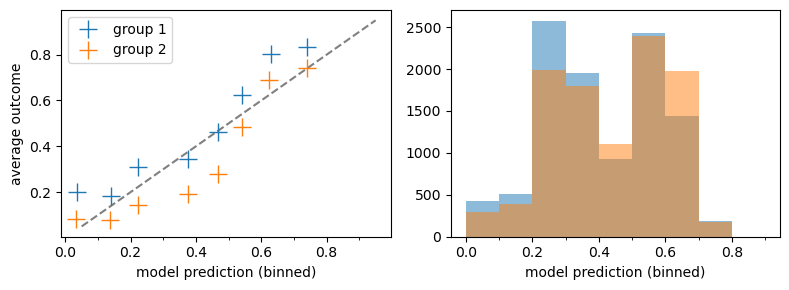

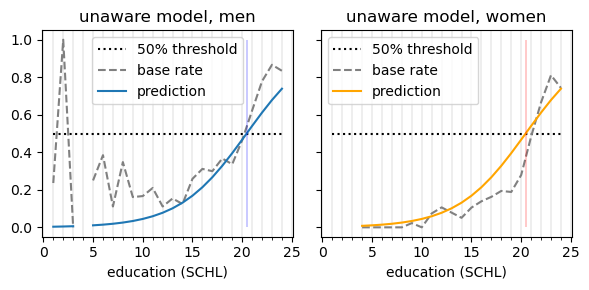

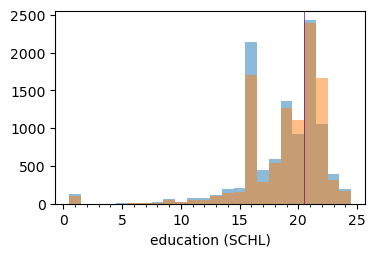

In [7]:
# get SCHL thresholds for positive classification (>0.5 prediction)
thresholds = get_SCHL_thresholds(model, with_PA=False)
# prediction calibration
plot_calibration_curve(yhat_probs, y_test, group_test)
# calibration per X value
plot_x_calibration_curves(yhat_probs, group_test, X_test, y_test, thresholds, 'unaware')

In [8]:
print('Disparate Impact reduction:', out1-out2)
print('AUC difference:', auc1-auc2)
print('Accuracy difference:', acc1-acc2)

Disparate Impact reduction: 0.32461054669057743
AUC difference: 0.005654357560991308
Accuracy difference: 0.0007279786459596371


# GBM models

In [9]:
MODEL = 'GBM_opt'

## aware GBM model

In [10]:
features, label, group = create_acs_dataset('income', STATE, THRESHOLD, include_protected=True, 
                                        protected_att=PA, only_features=['SCHL'])

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=SEED)

# model
model = get_model(MODEL)
model.fit(X_train, y_train)

yhat = model.predict(X_test)
yhat_probs = model.predict_proba(X_test)[:,1]

acc1, auc1, out1 = print_stats(y_test, yhat, yhat_probs, group_test)

dataset size: (103021, 2)
base rates: 0.4698852772466539 0.35899457861015277
avg prediction: 0.47138104366146777 0.35764916768650457
avg outcome: 0.3887189292543021 0.21241991128634796
auroc: 0.7538323489183774
accuracy: 0.7027905848095123
accuracy per group: 0.6830783938814532 0.7231148348940365


#### plots

[20.5, 21.5]


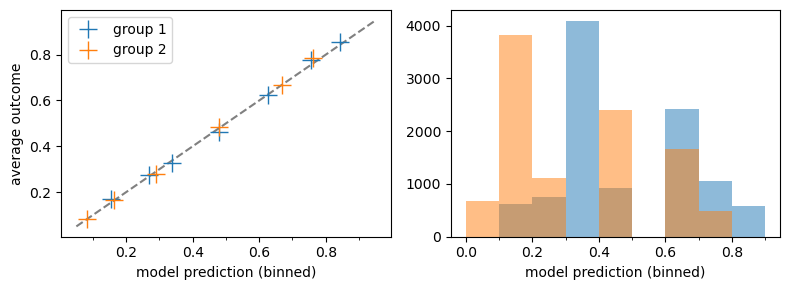

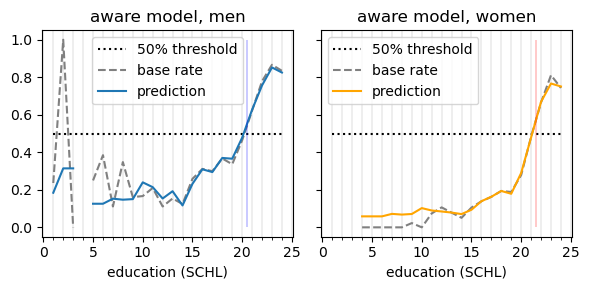

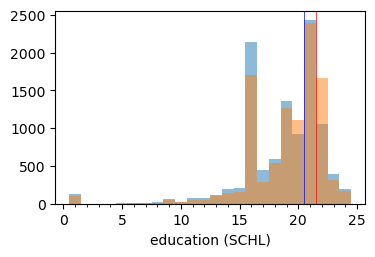

In [11]:
# get SCHL thresholds for positive classification (>0.5 prediction)
thresholds = get_SCHL_thresholds(model, with_PA=True)
print(thresholds)
# prediction calibration
plot_calibration_curve(yhat_probs, y_test, group_test)
# calibration per X value
plot_x_calibration_curves(yhat_probs, group_test, X_test, y_test, thresholds, 'aware')

## unaware GBM model

In [12]:
features, label, group = create_acs_dataset('income', STATE, THRESHOLD, include_protected=False, 
                                        protected_att=PA, only_features=['SCHL'])

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=SEED)

# model
model = get_model(MODEL)
model.fit(X_train, y_train)

yhat = model.predict(X_test)
yhat_probs = model.predict_proba(X_test)[:,1]

acc2, auc2, out2 = print_stats(y_test, yhat, yhat_probs, group_test)

dataset size: (103021, 1)
base rates: 0.4698852772466539 0.35899457861015277
avg prediction: 0.3996975173368623 0.4308663440569037
avg outcome: 0.3887189292543021 0.4486939379004436
auroc: 0.7321500488637945
accuracy: 0.6988595001213298
accuracy per group: 0.6830783938814532 0.7151306062099556


#### plots

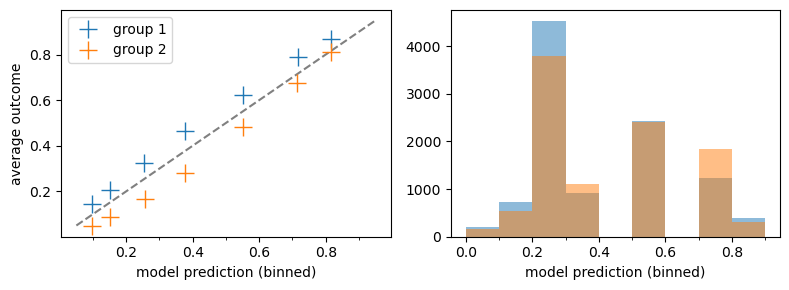

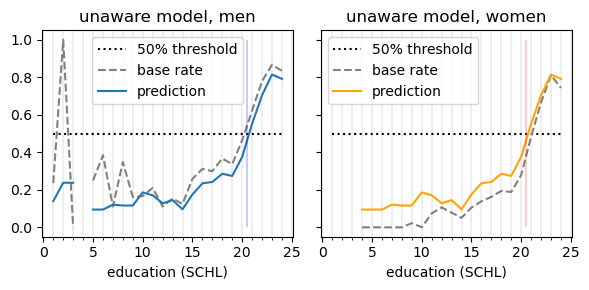

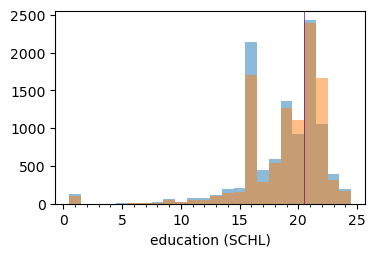

In [13]:
# get SCHL thresholds for positive classification (>0.5 prediction)
thresholds = get_SCHL_thresholds(model, with_PA=False)
# prediction calibration
plot_calibration_curve(yhat_probs, y_test, group_test)
# calibration per X value
plot_x_calibration_curves(yhat_probs, group_test, X_test, y_test, thresholds, 'unaware')

In [14]:
print('Disparate Impact reduction:', out1-out2)
print('AUC difference:', auc1-auc2)
print('Accuracy difference:', acc1-acc2)

Disparate Impact reduction: 0.23627402661409563
AUC difference: 0.021682300054582826
Accuracy difference: 0.003931084688182485


# sigmoid plot

In [15]:
import scipy

a = scipy.special.logit(0.95)
b = scipy.special.logit(0.9)
print(a)
print(b)
print(a-b)
c = scipy.special.expit(a-b)
print(c)

2.9444389791664394
2.1972245773362196
0.7472144018302198
0.6785714285714283


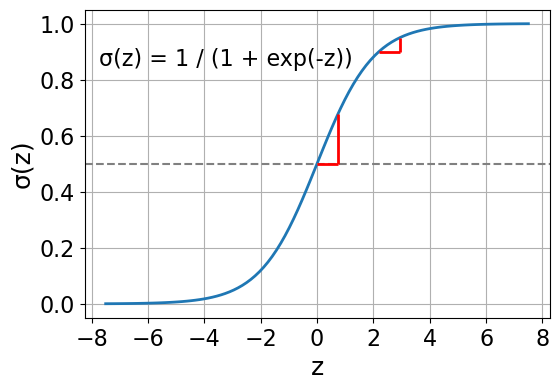

In [16]:
x = np.linspace(-7.5, 7.5, 100)
y = 1 / (1 + np.exp(-x))

fig = plt.figure(figsize=(6, 4))

plt.plot(x, y, linewidth=2)
plt.grid(True)

# 50% threshold line
plt.axhline(0.5, ls='--', color='grey')

# triangles
plt.hlines(0.9, a, b, color='red', linewidth=2)
plt.hlines(0.5, 0, (a-b), color='red', linewidth=2)
plt.vlines(a, 0.9, 0.95, color='red', linewidth=2)
plt.vlines(a-b, 0.5, c, color='red', linewidth=2)

# axis labels
plt.xlabel("z", fontsize=18)  # Increase label font size
plt.ylabel("σ(z)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.title("Sigmoid Function", fontsize=20)  # Increase title font size

# text: sigmoid formula
plt.text(-7.73, 0.85, "σ(z) = 1 / (1 + exp(-z))", fontsize=16)

plt.show()